# Netflix Analysis

The dataset consists of information on Netflix titles, including movies and TV shows. The dataset contains the following columns:

**Data dictionary:**
-  show_id: Unique identifier for each show.
-  type: Type of the show (Movie or TV Show).
-  title: Title of the show.
-  director: Director of the show.
-  cast: Main cast of the show.
-  country: Country where the show was produced.
-  date_added: Date when the show was added to Netflix.
-  release_year: Release year of the show.
-  rating: Rating of the show.
-  duration: Duration of the show.
-  listed_in: Genres of the show.
-  description: Description of the show.


#### 1. Uploading the excel file on Jupyter notebook

In [19]:
import pandas as pd

file_path = 'netflix_data_analysis.xlsx'  
netflix_data = pd.read_excel(file_path)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,700,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,325,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,325,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",United States,"September 24, 2021",2021,TV-MA,700,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 2. Data Cleaning

In [20]:
# Missing Values

missing_values = netflix_data.isnull().sum()
missing_values

show_id            0
type               0
title              1
director        2633
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [24]:
# replacing missing director and cast information with "unknown"
netflix_data['title'].fillna('Unknown', inplace=True)
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

#### 3. Data types

In [25]:
data_types = netflix_data.dtypes
data_types

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
dtype: object

#### 4. Descriptive Statistics

**Summary Statistics:**

In [29]:
summary_statistics = netflix_data.describe(include='all')
summary_statistics

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8805,8805,8805,8805,8805,8805,8805,8805.000000,8805,8805.000000,8805,8805
unique,8805,2,8802,4528,7691,740,1718,NaN,14,NaN,514,8773
top,s1,Movie,2024-08-15 00:00:00,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,NaN,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6130,2,2633,825,3654,111,NaN,3210,NaN,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180239,NaN,245.325610,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.820301,NaN,359.900973,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,8.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,93.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,111.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,325.000000,NaN,NaN


**Distribution of Categorical Variables:**

In [31]:
type_distribution = netflix_data['type'].value_counts()
country_distribution = netflix_data['country'].value_counts()
genre_distribution = netflix_data['listed_in'].value_counts()
rating_distribution = netflix_data['rating'].value_counts()

print(type_distribution)
print(country_distribution)
print(genre_distribution)
print(rating_distribution)

type
Movie      6130
TV Show    2675
Name: count, dtype: int64
country
United States                                                      3654
India                                                               970
United Kingdom                                                      415
Japan                                                               237
South Korea                                                         206
                                                                   ... 
India, United Kingdom, Canada, United States                          1
United Kingdom, United States, Germany, Denmark, Belgium, Japan       1
United States, Poland                                                 1
Mauritius, South Africa                                               1
United Arab Emirates, Jordan                                          1
Name: count, Length: 740, dtype: int64
listed_in
Dramas, International Movies                          362
Documentaries                 

#### 5. Exploratory Data Analysis (EDA)

**Types of Content:**

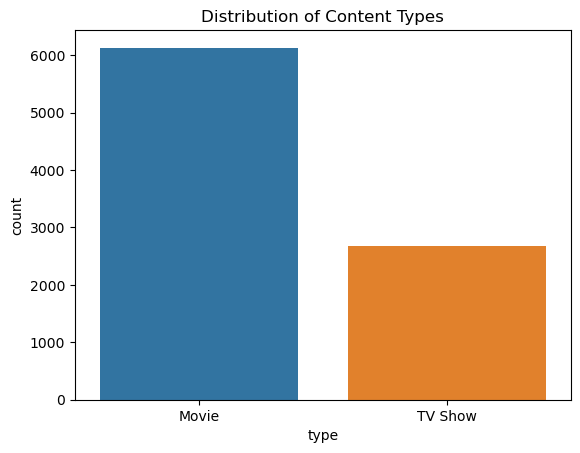

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=netflix_data, x='type')
plt.title('Distribution of Content Types')
plt.show()

**Content over the Years:**

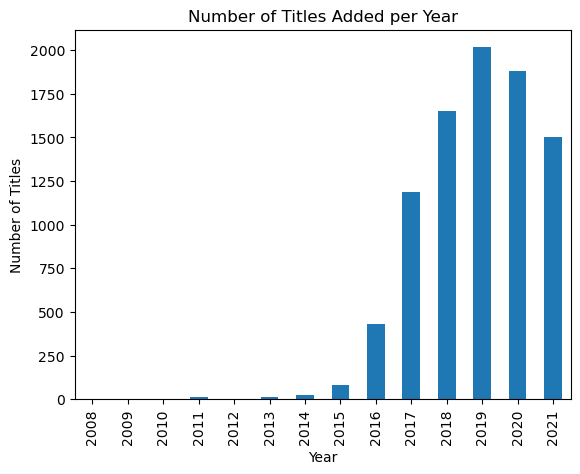

In [34]:
# Convert 'date_added' column to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Extract year from the date as a string
netflix_data['year_added'] = netflix_data['date_added'].dt.strftime('%Y')

# Count the number of titles added per year
content_by_year = netflix_data['year_added'].value_counts().sort_index()

# Plotting
content_by_year.plot(kind='bar')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

**Country Distribution:**

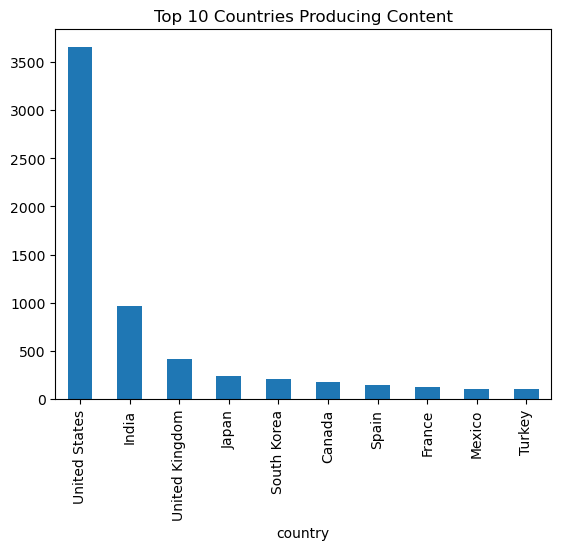

In [35]:
top_countries = netflix_data['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries Producing Content')
plt.show()

**Genre Distribution:**

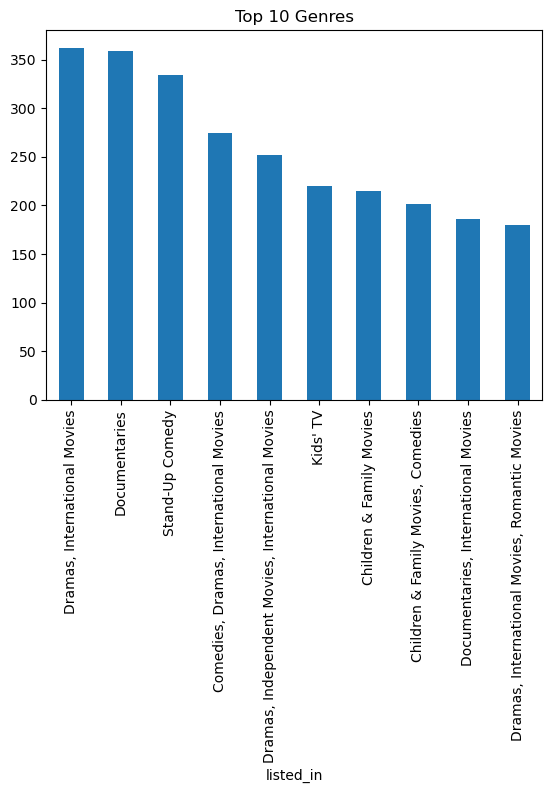

In [36]:
top_genres = netflix_data['listed_in'].value_counts().head(10)
top_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.show()

**Duration Analysis:**

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check unique values in the 'duration' column
unique_durations = netflix_data['duration'].unique()
print(unique_durations)

# Now we can identify what's causing the issue and decide how to handle it

[  90  700  325   91  125 2925  104  127 1300   67   94 1625  161   61
  166  147  103   97  106  111  975  110  105   96  124  116   98   23
  115  122   99   88  100 1950  102   93   95   85   83  113   13  182
   48  145   87   92   80  117  128  119  143  114  118  108   63  121
  142  154  120   82  109  101   86  229   76   89  156  112  107  129
  135  136  165  150  133   70   84  140   78 2275   64   59  139   69
  148  189  141  130  138   81  132 3250  123   65   68   66   62   74
  131   39   46   38 2600 5525  126  155  159  137   12  273   36   34
   77   60   49   58   72  204  212   25   73   29   47   32   35   71
  149   33   15   54  224  162   37   75   79   55  158  164  173  181
  185   21   24   51  151   42   22  134  177 4225   52   14   53    8
   57   28   50   26   45  171   27   44  146   20  157   17  203   41
   30  194 4875  233  237  230  195  253  152  190  160  208  180  144
  174  170  192  209  187  172   16  186   11  193  176   56  169   40
   10 

C:\Users\shali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


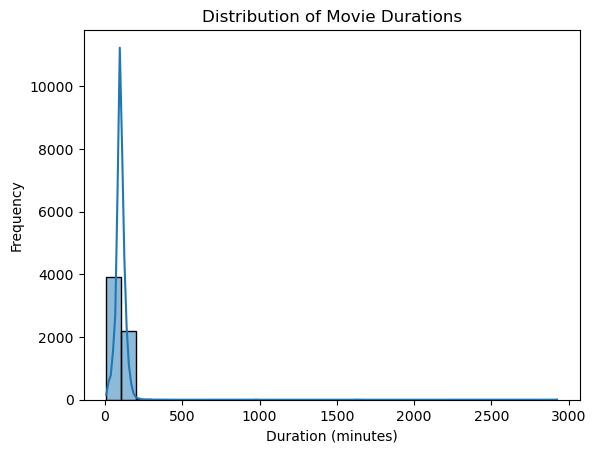

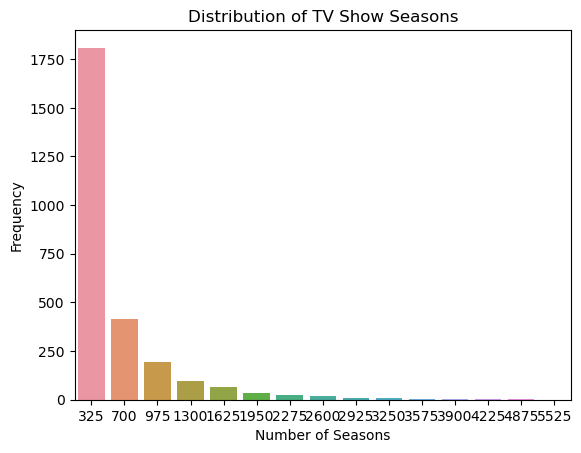

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of movie durations
sns.histplot(data=netflix_data[netflix_data['type'] == 'Movie'], x='duration', bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of TV show seasons
sns.countplot(data=netflix_data[netflix_data['type'] == 'TV Show'], x='duration')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

**Ratings Distribution:**

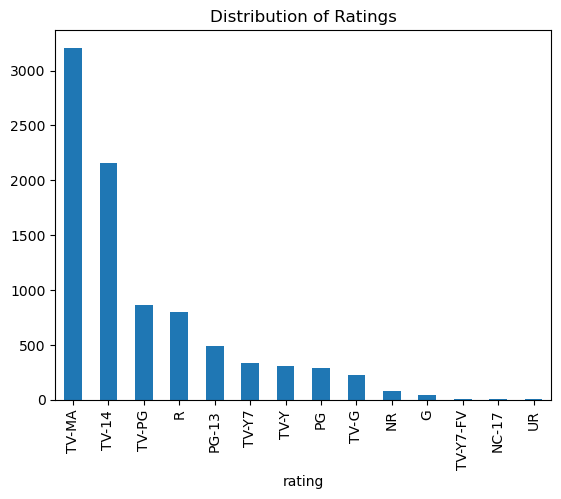

In [41]:
rating_distribution.plot(kind='bar')
plt.title('Distribution of Ratings')
plt.show()

#### 6. Data Analysis

**Content Type Distribution**

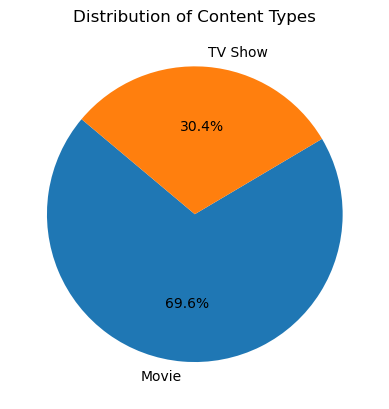

In [42]:
type_distribution = netflix_data['type'].value_counts()
type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types')
plt.ylabel('')
plt.show()

**Trends Over Time**

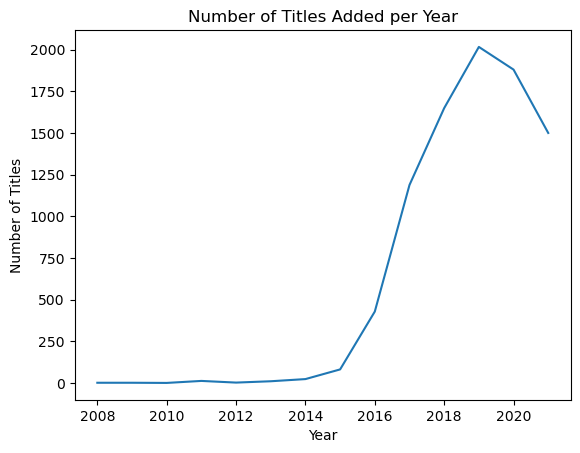

In [43]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
content_by_year = netflix_data['date_added'].dt.year.value_counts().sort_index()
content_by_year.plot(kind='line')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

**Country Distribution**

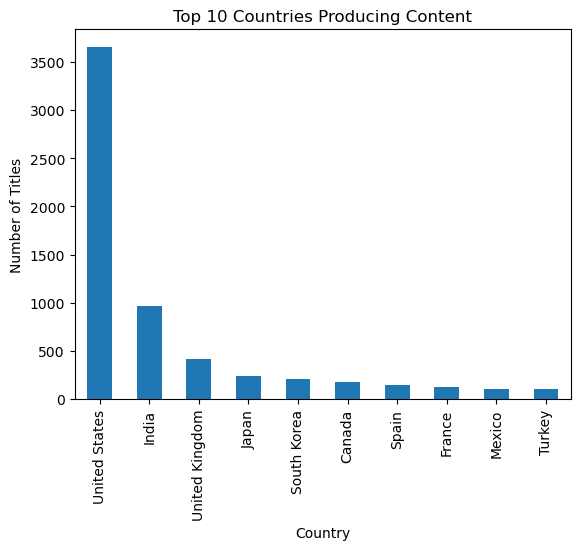

In [44]:
top_countries = netflix_data['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

**Genre Distribution**

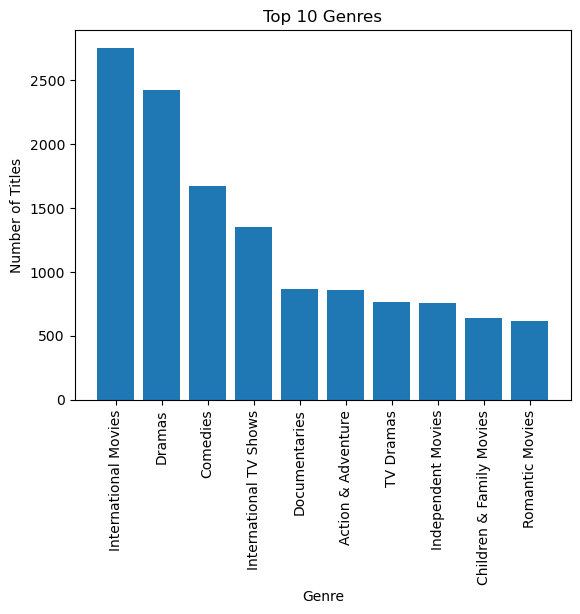

In [45]:
from collections import Counter

genre_list = netflix_data['listed_in'].str.split(', ').tolist()
genre_counts = Counter([genre for sublist in genre_list for genre in sublist])
top_genres = genre_counts.most_common(10)

genres, counts = zip(*top_genres)
plt.bar(genres, counts)
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()
